In [1]:
import cv2
input_video_path = "F:\\valorant_video_annotation\\input_video_2.mp4"
output_video_path = "F:\\valorant_video_annotation\\input_video_2_pp.mp4"
cap = cv2.VideoCapture(input_video_path)

fps = int(cap.get(cv2.CAP_PROP_FPS))
new_fps = fps


new_frame_size = (960, 540)

fourcc = int(cap.get(cv2.CAP_PROP_FOURCC))
out = cv2.VideoWriter(output_video_path, fourcc, new_fps, new_frame_size)

frame_count = 0
while True:
    ret, frame = cap.read()
    
    if not ret:
        break
    
    resized_frame = cv2.resize(frame, new_frame_size)
    
    # if frame_count % 4 == 0:
    out.write(resized_frame)
    
    frame_count += 1

cap.release()
out.release()


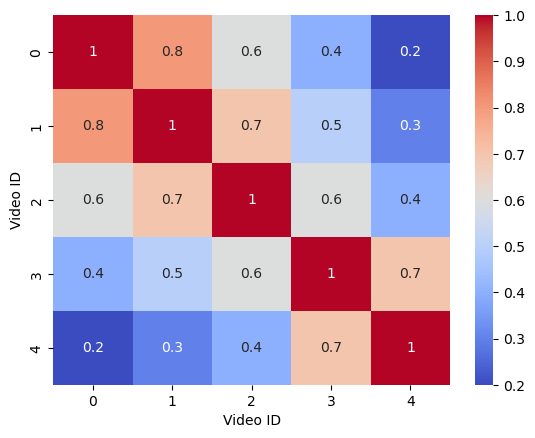

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


similarity_matrix = np.array([[1.0, 0.8, 0.6, 0.4, 0.2],
                              [0.8, 1.0, 0.7, 0.5, 0.3],
                              [0.6, 0.7, 1.0, 0.6, 0.4],
                              [0.4, 0.5, 0.6, 1.0, 0.7],
                              [0.2, 0.3, 0.4, 0.7, 1.0]])

sns.heatmap(similarity_matrix, annot=True, cmap='coolwarm')

# You can customize the labels if you have them
plt.xlabel('Video ID')
plt.ylabel('Video ID')
plt.show()

In [3]:
import torch
from torch.nn.functional import cosine_similarity

def calculate_similarity(tensor1, tensor2):
    tensor1_flat = tensor1.view(-1)
    tensor2_flat = tensor2.view(-1)
    similarity = cosine_similarity(tensor1_flat.unsqueeze(0), tensor2_flat.unsqueeze(0))

    return similarity.item()

video_tensor0 = torch.rand(10, 3, 224, 224)  # Just for example
video_tensor1 = torch.rand(10, 3, 224, 224)  # Just for example

similarity = calculate_similarity(video_tensor0, video_tensor1)
print("The similarity between the two tensors is: ", similarity)

The similarity between the two tensors is:  0.7496355772018433
